#  Masking Pipeline

In [1]:
%matplotlib notebook

In [21]:
cd /XF11ID/analysis/Analysis_Pipelines/Develop/

/XF11ID/analysis/Analysis_Pipelines/Develop


In [22]:
%run Mask_Maker.py

## Detector

In [4]:
#detectors = ['eiger4m_single_image', 'eiger1m_single_image', 'eiger4m_image', 'eiger1m_image']
detector = 'eiger4m_single_image'  #for after 2015-12 data
detector = 'eiger_4M_cam_img_image_lightfield'  #for before 2015-12 data


# Result save path

In [5]:
path = '/home/yuzhang/Analysis/2016_1/Results/'
print ("The analysis results will be saved in : %s"%path)

The analysis results will be saved in : /home/yuzhang/Analysis/2016_1/Results/


### Get the image series and metadata from the uid

In [6]:
uid='ee6975a1-9161'   #1% wt PEG
sn = 'SiO2_Colloidal'

hdr = db[uid]

In [7]:
get_sid_filenames(db[uid])

(1224,
 'ee6975a1-9161-4315-9929-4db995a91b5c',
 ['/XF11ID/data/2015/11/23/5f7b93e2-71ef-41b0-9c2c_138'])

In [8]:
imgs = load_data( uid, detector  )
md = imgs.md

hdf5 path = /XF11ID/data/2015/11/23/5f7b93e2-71ef-41b0-9c2c_138_master.h5


In [9]:
imgs

<Frames>
Length: 10000 frames
Frame Shape: 2167 x 2070
Pixel Datatype: uint16

In [10]:
Nimg=len(imgs)

## show image and the pixel mask

<IPython.core.display.Javascript object>


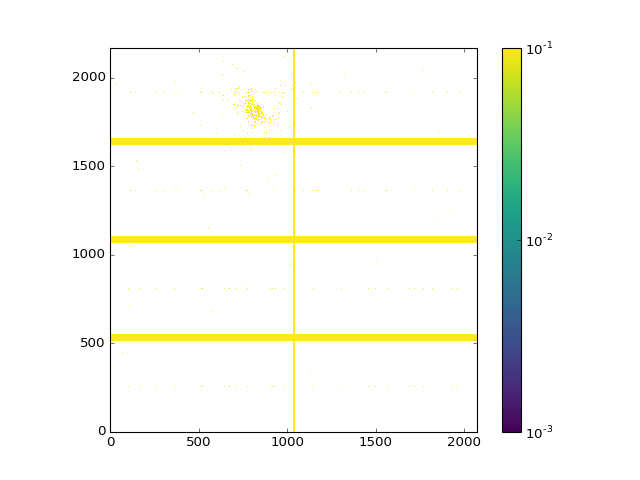

In [11]:
show_img(  imgs[0] , norm= LogNorm( vmin=.001,vmax=.1 ) )

<IPython.core.display.Javascript object>


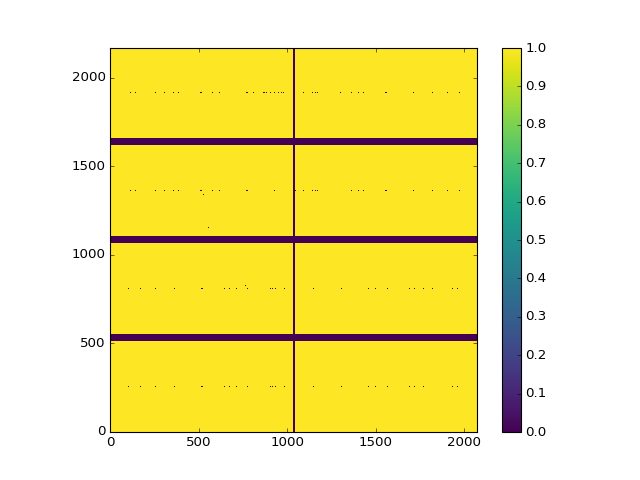

In [12]:
show_img(md['pixel_mask'], vmin=0, vmax=1)

## Remove hotspots in the image

<IPython.core.display.Javascript object>


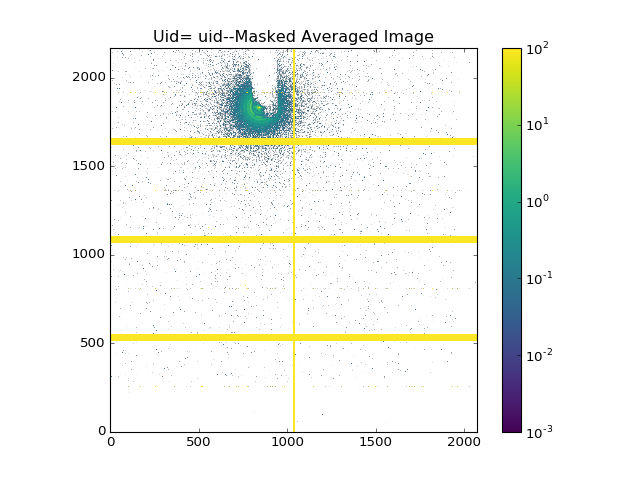

In [13]:
avg_img =  get_avg_img( imgs, sampling = 500, plot_ = True, )

<IPython.core.display.Javascript object>


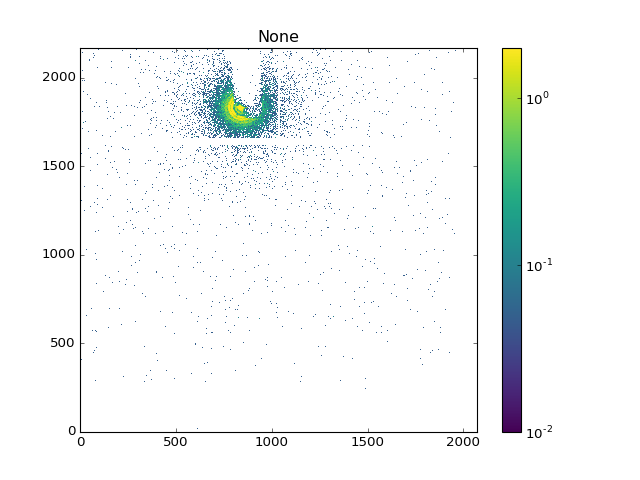

In [41]:
show_img(  avg_img*md['pixel_mask'],   vmin= .01, vmax= 2, logs= True  )

<IPython.core.display.Javascript object>


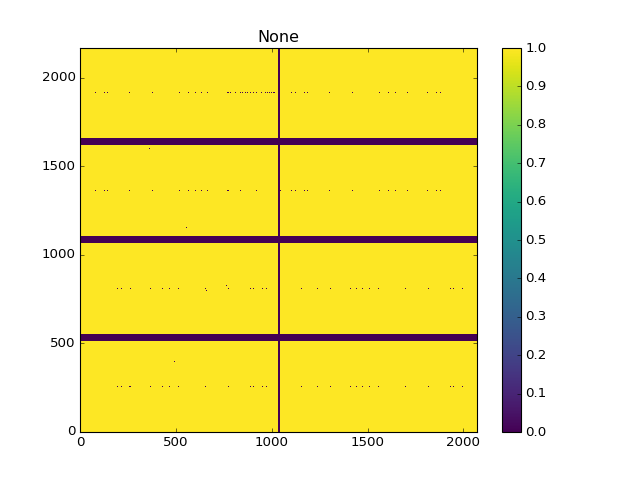

In [31]:
mask_rh  = RemoveHot( avg_img, 5E4, plot_=True)

## Manually create the mask file

<IPython.core.display.Javascript object>


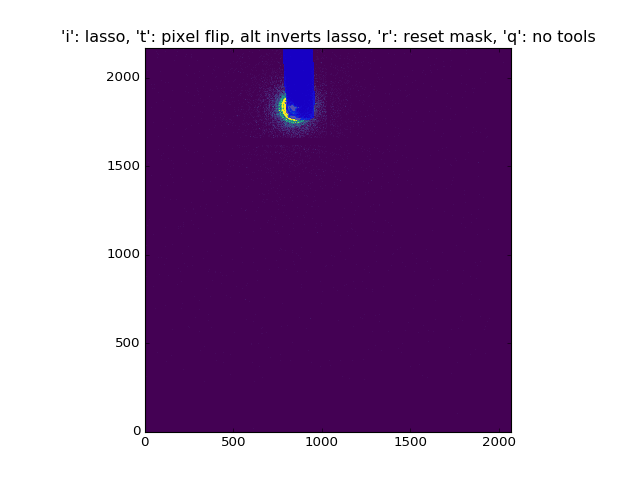

In [55]:
fig, ax = plt.subplots()
m = ManualMask(ax, avg_img* md['pixel_mask']*mask_rh,
               cmap='viridis',origin='lower',
               vmin=.01, vmax=1.50) 
plt.show()

<IPython.core.display.Javascript object>


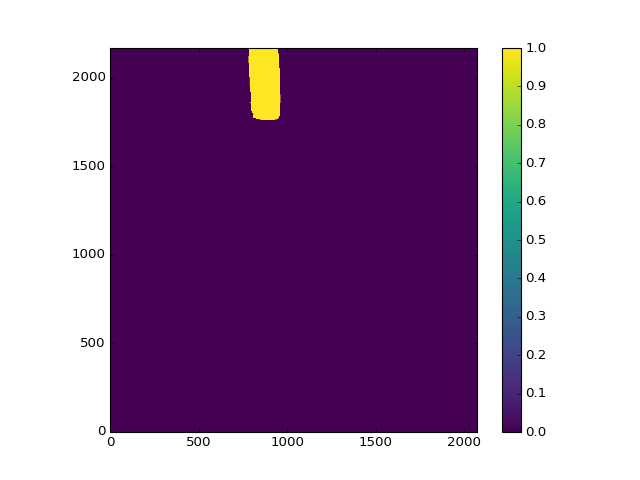

In [57]:
new_mask = m.mask
manu_mask  = new_mask.copy()
fig, ax = plt.subplots()
im=ax.imshow(new_mask,origin='lower' ,vmin=0, vmax=1,cmap='viridis')
fig.colorbar(im)
plt.show()

In [63]:
manu_mask  = new_mask.copy()

# Create rectangle mask

In [58]:
#new_mask = np.zeros_like( avg_img , dtype = bool)
# capton window
#new_mask[2000:2167, :] = True
#new_mask[:, :100] = True
#new_mask[1700:2167, 100:300] = True

# capton window
#new_mask[:, :120] = True
#new_mask[:120, :] = True
#new_mask[:200, :200] = True
#new_mask[-120:, 0:200] = True

#the h-beam stop
new_mask[  1820:1840,:] = True #a horenzatal one

#new_mask[:, 1190:1230] = True #a vertical one


#new_mask[1450:1520, :] = True

#new_mask[1290:1380, 1370:2070] = True
#new_mask[:, 1180:1220] = True

#new_mask[1260:1380, 1150:1265] = True



<IPython.core.display.Javascript object>


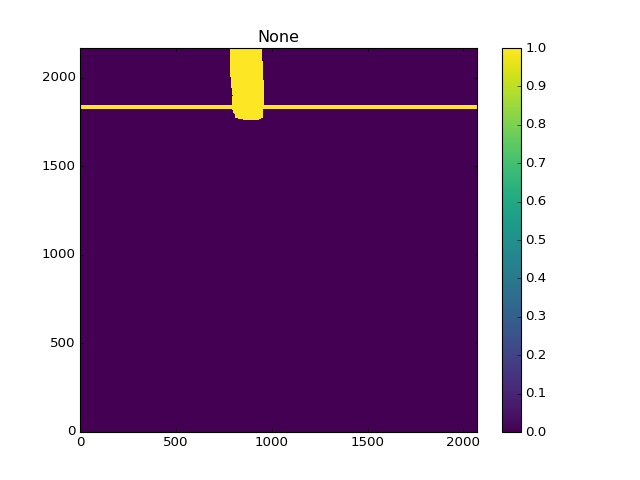

In [59]:
show_img( new_mask )

In [64]:
Mask = np.array ( ~new_mask*  md['pixel_mask']*mask_rh, dtype = bool )

<IPython.core.display.Javascript object>


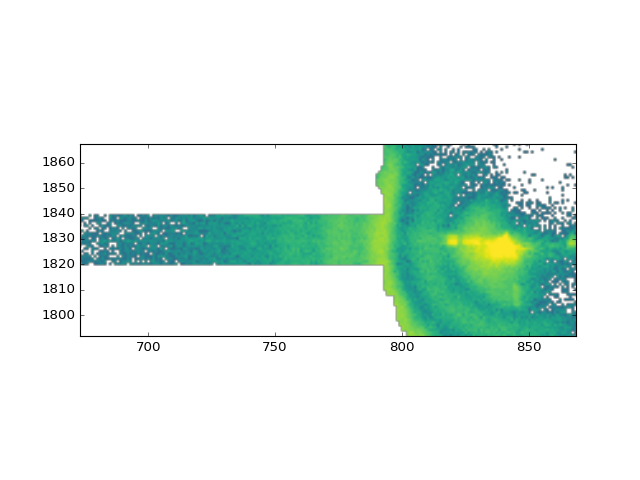

In [65]:
fig, ax = plt.subplots()
#new_mask = 
im=ax.imshow(   (~Mask) * avg_img,origin='lower' , 
      norm= LogNorm( vmin=0.001, vmax=30 ), cmap='viridis')
#im = ax.imshow(avg_img,  cmap='viridis',origin='lower', norm= LogNorm( vmin=0.001, vmax=100 ) )
plt.show()


<IPython.core.display.Javascript object>


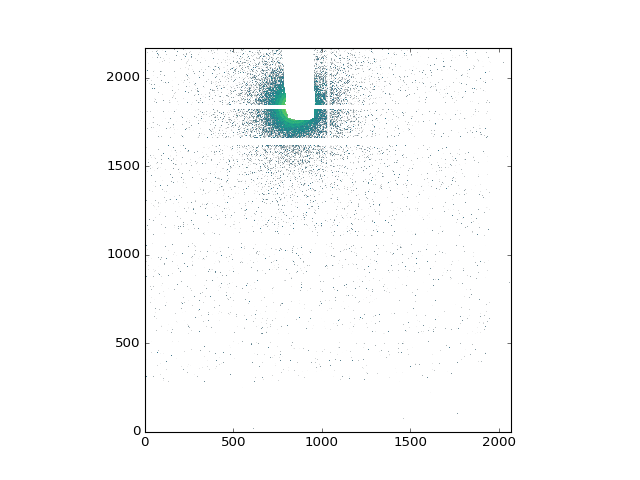

In [66]:
fig, ax = plt.subplots()
#new_mask = 
im=ax.imshow(   (Mask) * avg_img,origin='lower' , 
      norm= LogNorm( vmin=0.001, vmax=30 ), cmap='viridis')
#im = ax.imshow(avg_img,  cmap='viridis',origin='lower', norm= LogNorm( vmin=0.001, vmax=100 ) )
plt.show()

## Combine the hand-drawn mask and the pixel mask and hot pixel mask

<IPython.core.display.Javascript object>


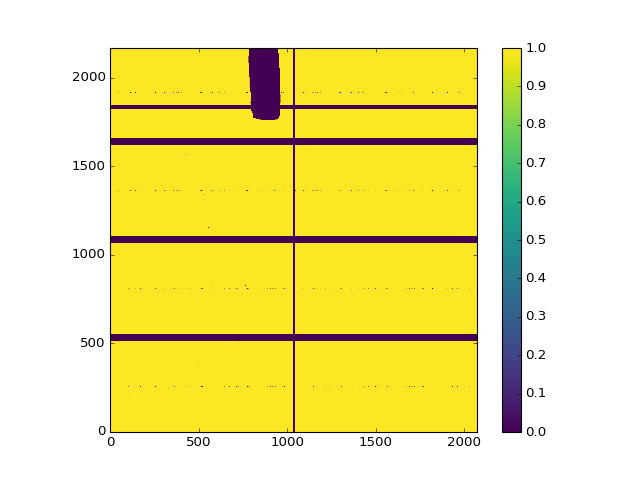

In [67]:
mask = (~new_mask)*md['pixel_mask']*mask_rh

fig, ax = plt.subplots()
im=ax.imshow(mask, origin='lower' ,vmin=0, vmax=1,cmap='viridis')
fig.colorbar(im)
plt.show()

## Save the combined mask to use in further data analysis

In [70]:
np.save(  path +   uid +"_mask", mask)

In [71]:
path +   uid +"_mask"

'/home/yuzhang/Analysis/2016_1/Results/ee6975a1-9161_mask'